# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

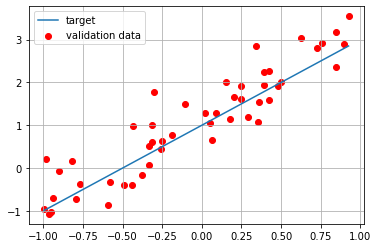

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 1s 12ms/step - loss: 2.3623 - mse: 2.3623 - val_loss: 2.0686 - val_mse: 2.0686
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 1.7659 - mse: 1.7659 - val_loss: 1.5760 - val_mse: 1.5760
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 1.3714 - mse: 1.3714 - val_loss: 1.2427 - val_mse: 1.2427
Epoch 4/30
16/16 [==============================] - 0s 5ms/step - loss: 1.1010 - mse: 1.1010 - val_loss: 1.0091 - val_mse: 1.0091
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.9070 - mse: 0.9070 - val_loss: 0.8349 - val_mse: 0.8349
Epoch 6/30
16/16 [==============================] - 0s 6ms/step - loss: 0.7607 - mse: 0.7607 - val_loss: 0.7072 - val_mse: 0.7072
Epoch 7/30
16/16 [==============================] - 0s 5ms/step - loss: 0.6523 - mse: 0.6523 - val_loss: 0.6122 - val_mse: 0.6122
Epoch 8/30
16/16 [==============================] - 0s 5ms/step - loss: 0.5694 - mse: 0.5

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [7]:
# return weights and biases
model.get_weights()

[array([[1.9732777]], dtype=float32), array([0.94430035], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.2785 - mse: 0.2785

Test loss: 0.2785184383392334
Test accuracy: 0.2785184383392334


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032

Test loss: 0.0031744027510285378
Test accuracy: 0.0031744027510285378


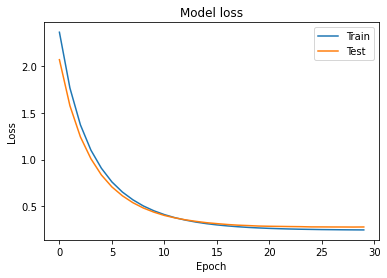

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

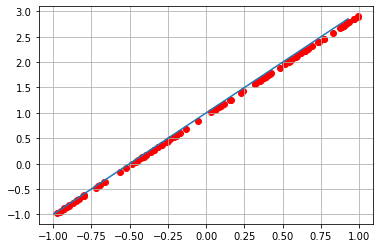

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

##  Model 2 : $\sigma = 0.5  , N_{train} = 600  ,  epochs = 20 $

In [20]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 600)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

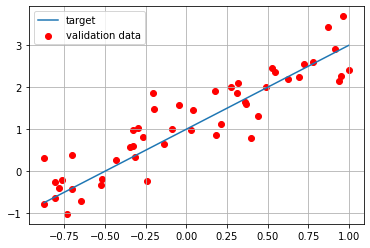

In [21]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [23]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/20
19/19 [==============================] - 1s 8ms/step - loss: 3.9914 - mse: 3.9914 - val_loss: 3.2161 - val_mse: 3.2161
Epoch 2/20
19/19 [==============================] - 0s 3ms/step - loss: 2.9270 - mse: 2.9270 - val_loss: 2.3295 - val_mse: 2.3295
Epoch 3/20
19/19 [==============================] - 0s 4ms/step - loss: 2.2124 - mse: 2.2124 - val_loss: 1.7395 - val_mse: 1.7395
Epoch 4/20
19/19 [==============================] - 0s 3ms/step - loss: 1.7149 - mse: 1.7149 - val_loss: 1.3280 - val_mse: 1.3280
Epoch 5/20
19/19 [==============================] - 0s 4ms/step - loss: 1.3531 - mse: 1.3531 - val_loss: 1.0339 - val_mse: 1.0339
Epoch 6/20
19/19 [==============================] - 0s 4ms/step - loss: 1.0855 - mse: 1.0855 - val_loss: 0.8205 - val_mse: 0.8205
Epoch 7/20
19/19 [==============================] - 0s 4ms/step - loss: 0.8845 - mse: 0.8845 - val_loss: 0.6645 - val_mse: 0.6645
Epoch 8/20
19/19 [==============================] - 0s 4ms/step - loss: 0.7320 - mse: 0.73

In [24]:
# evaluate model
score = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.2467 - mse: 0.2467

Test loss: 0.24665385484695435
Test accuracy: 0.24665385484695435


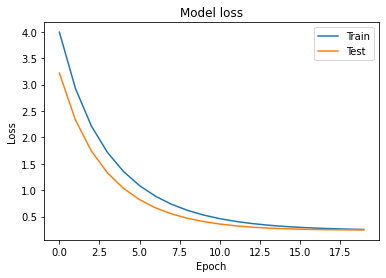

In [25]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

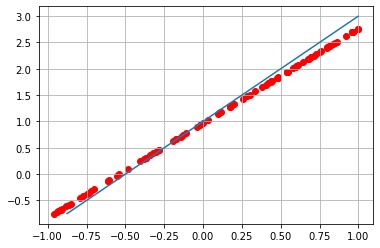

In [26]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

##  Model 3 : $\sigma = 0.7  , N_{train} = 700  ,  epochs = 25 $

In [27]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 700)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.7 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

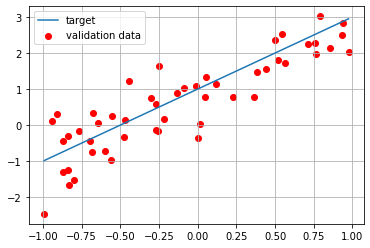

In [28]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
model3 = tf.keras.Sequential()
model3.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [30]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=25,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/25
22/22 [==============================] - 1s 7ms/step - loss: 1.3924 - mse: 1.3924 - val_loss: 0.6689 - val_mse: 0.6689
Epoch 2/25
22/22 [==============================] - 0s 3ms/step - loss: 0.9300 - mse: 0.9300 - val_loss: 0.4967 - val_mse: 0.4967
Epoch 3/25
22/22 [==============================] - 0s 3ms/step - loss: 0.7169 - mse: 0.7169 - val_loss: 0.4322 - val_mse: 0.4322
Epoch 4/25
22/22 [==============================] - 0s 4ms/step - loss: 0.6116 - mse: 0.6116 - val_loss: 0.4084 - val_mse: 0.4084
Epoch 5/25
22/22 [==============================] - 0s 4ms/step - loss: 0.5554 - mse: 0.5554 - val_loss: 0.3996 - val_mse: 0.3996
Epoch 6/25
22/22 [==============================] - 0s 5ms/step - loss: 0.5227 - mse: 0.5227 - val_loss: 0.3960 - val_mse: 0.3960
Epoch 7/25
22/22 [==============================] - 0s 3ms/step - loss: 0.5023 - mse: 0.5023 - val_loss: 0.3943 - val_mse: 0.3943
Epoch 8/25
22/22 [==============================] - 0s 3ms/step - loss: 0.4885 - mse: 0.48

In [31]:
# evaluate model
score = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.4038 - mse: 0.4038

Test loss: 0.40379998087882996
Test accuracy: 0.40379998087882996


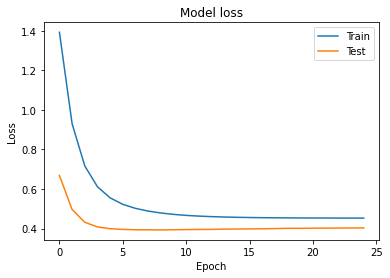

In [32]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

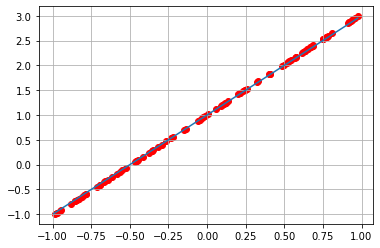

In [33]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

##  Model 4 : $\sigma = 0.2  , N_{train} = 400  ,  epochs = 30 $

In [34]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 400)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

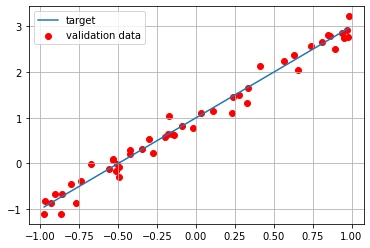

In [35]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
model4 = tf.keras.Sequential()
model4.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [37]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model4.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
13/13 [==============================] - 1s 11ms/step - loss: 1.9339 - mse: 1.9339 - val_loss: 1.7527 - val_mse: 1.7527
Epoch 2/30
13/13 [==============================] - 0s 3ms/step - loss: 1.4509 - mse: 1.4509 - val_loss: 1.3620 - val_mse: 1.3620
Epoch 3/30
13/13 [==============================] - 0s 5ms/step - loss: 1.1246 - mse: 1.1246 - val_loss: 1.0799 - val_mse: 1.0799
Epoch 4/30
13/13 [==============================] - 0s 4ms/step - loss: 0.8895 - mse: 0.8895 - val_loss: 0.8727 - val_mse: 0.8727
Epoch 5/30
13/13 [==============================] - 0s 5ms/step - loss: 0.7177 - mse: 0.7177 - val_loss: 0.7133 - val_mse: 0.7133
Epoch 6/30
13/13 [==============================] - 0s 5ms/step - loss: 0.5865 - mse: 0.5865 - val_loss: 0.5917 - val_mse: 0.5917
Epoch 7/30
13/13 [==============================] - 0s 5ms/step - loss: 0.4869 - mse: 0.4869 - val_loss: 0.4941 - val_mse: 0.4941
Epoch 8/30
13/13 [==============================] - 0s 5ms/step - loss: 0.4076 - mse: 0.4

In [38]:
# evaluate model
score = model4.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0395 - mse: 0.0395

Test loss: 0.039468713104724884
Test accuracy: 0.039468713104724884


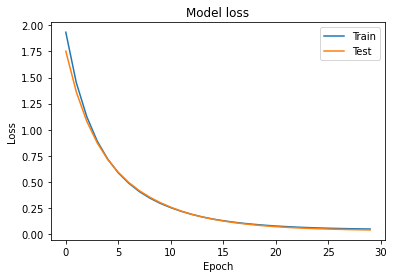

In [39]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

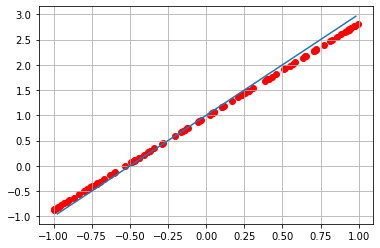

In [40]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model4.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

In [41]:
print(model2.get_weights())
print(model3.get_weights())
print(model4.get_weights())

[array([[1.7958863]], dtype=float32), array([0.96965414], dtype=float32)]
[array([[2.0314562]], dtype=float32), array([1.0020481], dtype=float32)]
[array([[1.843243]], dtype=float32), array([0.9721907], dtype=float32)]


1. Il modello uno ha $\sigma = 0.5$ , 600 dati di train e 20 epoche.
2. Il secodno modello ha $\sigma = 0.7$ , 700 dati di training e 25 epoche
3. Il terzo modello ha $\sigma = 0.2$ , 400 dati di training e 30 epoche.

    Il modello con le migliori previsioni è il secondo, da questo si capisce che: il numero di epoche non influisce molto, fintanto che sono più di 20/25 il training arriva a compimento e poi rimane stabile, quindi non sono necessarie più epoche. Si nota che maggiore è la sigma sui dati di training, maggiore è l'errore finale, cosa che è sensata. 
    Il numero di dati usati per fare il training invece influisce parecchio, nel modello 4 in cui sono drasticamente ridotti, la previsione del modello è decisamente più scarsa nonostante la sigma dei dati sia inferiore ai casi precedenti.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [12]:
def f( x ):
    return 4 - 3 * x - 2 * x**2 + 3 * x**3

In [22]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = f( x_valid )  # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal( f( x_train ) , sigma ) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal( f( x_valid ), sigma )

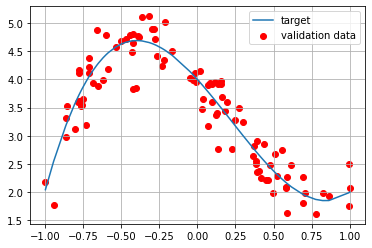

In [23]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
Model_1 = tf.keras.Sequential()
Model_1.add(Dense( 200 , input_shape=(1,) , activation= "relu" ))
Model_1.add(Dense( 100 , activation= "relu" ))
Model_1.add(Dense( 45 , activation= "relu" ))
Model_1.add(Dense( 1  , activation= "relu"))

# compile the model choosing optimizer, loss and metrics objects
Model_1.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=['mse'])

In [16]:
Model_2 = tf.keras.Sequential()
Model_2.add(Dense( 200 , input_shape=(1,) , activation= "selu" ))
Model_2.add(Dense( 45  , activation= "selu" ))
Model_2.add(Dense( 1  , activation= "selu" ))

# compile the model choosing optimizer, loss and metrics objects
Model_2.compile(optimizer=tf.keras.optimizers.Adamax(), loss="mse", metrics=['mse'])

In [17]:
Model_3 = tf.keras.Sequential()
Model_3.add(Dense( 200 , input_shape=(1,) , activation= "elu" ))
Model_3.add(Dense( 40 ,  activation= "elu" ))
Model_3.add(Dense( 1 ,  activation= "elu" ))

# compile the model choosing optimizer, loss and metrics objects
Model_3.compile(optimizer=tf.keras.optimizers.Nadam(), loss='mse', metrics=['mse'])

In [25]:
history_1 = Model_1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
157/157 [==============================] - 1s 3ms/step - loss: 2.3262 - mse: 2.3262 - val_loss: 0.2250 - val_mse: 0.2250
Epoch 2/30
157/157 [==============================] - 0s 2ms/step - loss: 0.1378 - mse: 0.1378 - val_loss: 0.1216 - val_mse: 0.1216
Epoch 3/30
157/157 [==============================] - 0s 2ms/step - loss: 0.1051 - mse: 0.1051 - val_loss: 0.1136 - val_mse: 0.1136
Epoch 4/30
157/157 [==============================] - 0s 2ms/step - loss: 0.0960 - mse: 0.0960 - val_loss: 0.1140 - val_mse: 0.1140
Epoch 5/30
157/157 [==============================] - 0s 2ms/step - loss: 0.0972 - mse: 0.0972 - val_loss: 0.1200 - val_mse: 0.1200
Epoch 6/30
157/157 [==============================] - 0s 2ms/step - loss: 0.0977 - mse: 0.0977 - val_loss: 0.1095 - val_mse: 0.1095
Epoch 7/30
157/157 [==============================] - 0s 2ms/step - loss: 0.0934 - mse: 0.0934 - val_loss: 0.1156 - val_mse: 0.1156
Epoch 8/30
157/157 [==============================] - 0s 2ms/step - loss: 0.

In [19]:
history_2 = Model_2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
157/157 [==============================] - 2s 5ms/step - loss: 1.9623 - mse: 1.9623 - val_loss: 0.4566 - val_mse: 0.4566
Epoch 2/30
157/157 [==============================] - 0s 2ms/step - loss: 0.4594 - mse: 0.4594 - val_loss: 0.3267 - val_mse: 0.3267
Epoch 3/30
157/157 [==============================] - 0s 2ms/step - loss: 0.3267 - mse: 0.3267 - val_loss: 0.2454 - val_mse: 0.2454
Epoch 4/30
157/157 [==============================] - 0s 2ms/step - loss: 0.2261 - mse: 0.2261 - val_loss: 0.1934 - val_mse: 0.1934
Epoch 5/30
157/157 [==============================] - 0s 3ms/step - loss: 0.1726 - mse: 0.1726 - val_loss: 0.1643 - val_mse: 0.1643
Epoch 6/30
157/157 [==============================] - 0s 2ms/step - loss: 0.1395 - mse: 0.1395 - val_loss: 0.1453 - val_mse: 0.1453
Epoch 7/30
157/157 [==============================] - 0s 2ms/step - loss: 0.1220 - mse: 0.1220 - val_loss: 0.1363 - val_mse: 0.1363
Epoch 8/30
157/157 [==============================] - 1s 3ms/step - loss: 0.

In [20]:
history_3 = Model_3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
157/157 [==============================] - 2s 5ms/step - loss: 2.3214 - mse: 2.3214 - val_loss: 0.5079 - val_mse: 0.5079
Epoch 2/30
157/157 [==============================] - 0s 2ms/step - loss: 0.4478 - mse: 0.4478 - val_loss: 0.3217 - val_mse: 0.3217
Epoch 3/30
157/157 [==============================] - 0s 3ms/step - loss: 0.2548 - mse: 0.2548 - val_loss: 0.2243 - val_mse: 0.2243
Epoch 4/30
157/157 [==============================] - 1s 3ms/step - loss: 0.1843 - mse: 0.1843 - val_loss: 0.1831 - val_mse: 0.1831
Epoch 5/30
157/157 [==============================] - 1s 4ms/step - loss: 0.1480 - mse: 0.1480 - val_loss: 0.1665 - val_mse: 0.1665
Epoch 6/30
157/157 [==============================] - 0s 2ms/step - loss: 0.1350 - mse: 0.1350 - val_loss: 0.1524 - val_mse: 0.1524
Epoch 7/30
157/157 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.1260 - val_loss: 0.3080 - val_mse: 0.3080
Epoch 8/30
157/157 [==============================] - 0s 2ms/step - loss: 0.

In [26]:
# evaluate model
score_1 = Model_1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score_2 = Model_2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score_3 = Model_3.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print("Model 1: ")
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

print("Model 2: ")
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

print("Model 3: ")
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])

4/4 [==============================] - 0s 9ms/step - loss: 0.1200 - mse: 0.1200
Model 1: 
Test loss: 0.11116020381450653
Test accuracy: 0.11116020381450653
Model 2: 
Test loss: 0.1255665421485901
Test accuracy: 0.1255665421485901
Model 3: 
Test loss: 0.11999587714672089
Test accuracy: 0.11999587714672089


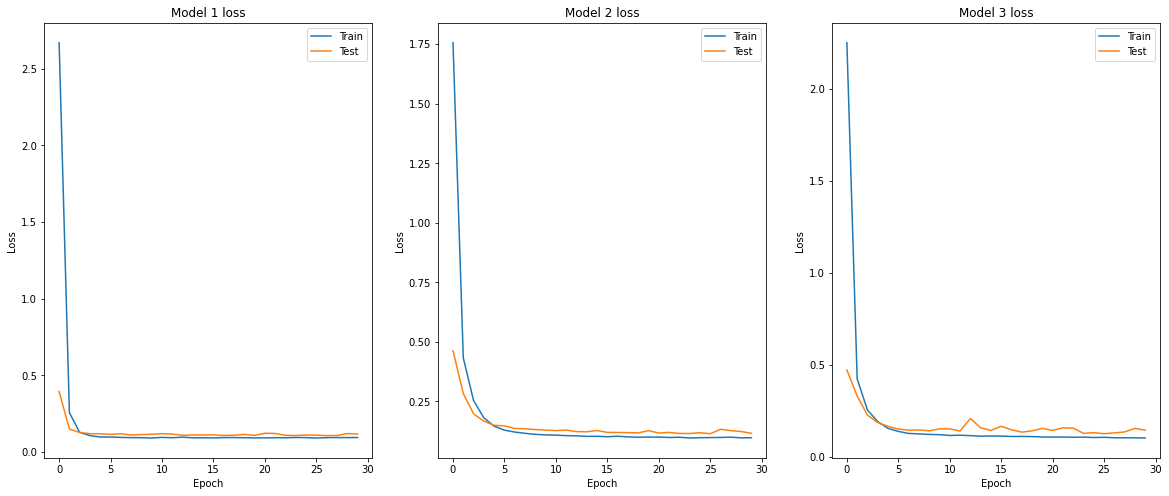

In [76]:
fig , ax = plt.subplots( 1 , 3 , figsize=(20 , 8))

# look into training history
# Plot training & validation loss values
ax[0].plot(history_1.history['loss'])
ax[0].plot(history_1.history['val_loss'])
ax[0].set_title('Model 1 loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='best')

ax[1].plot(history_2.history['loss'])
ax[1].plot(history_2.history['val_loss'])
ax[1].set_title('Model 2 loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')

ax[2].plot(history_3.history['loss'])
ax[2].plot(history_3.history['val_loss'])
ax[2].set_title('Model 3 loss')
ax[2].set_ylabel('Loss')
ax[2].set_xlabel('Epoch')
ax[2].legend(['Train', 'Test'], loc='best')

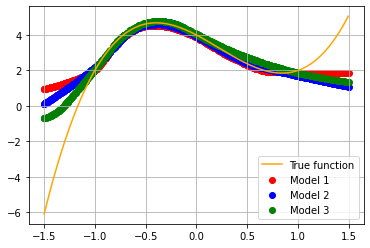

In [77]:
x_valid = np.random.uniform(-1.5, 1.5, 1000)
x_valid.sort()
y_target = f( x_valid )  # ideal (target) linear function
plt.plot(x_valid, y_target , color = "orange" , label = "True function")

x_predicted = np.random.uniform(-1.5, 1.5, 900)
y_predicted_1 = Model_1.predict(x_predicted)
y_predicted_2 = Model_2.predict(x_predicted)
y_predicted_3 = Model_3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted_1 ,color='red' , label = "Model 1 ")
plt.scatter(x_predicted, y_predicted_2 ,color='blue' , label = "Model 2 ")
plt.scatter(x_predicted, y_predicted_3 ,color='green' , label = "Model 3 ")
plt.legend(loc="best")
plt.grid(True)
plt.show()

    Il modello 1 è il più profondo, presenta 4 layers con attivazione "Relu" e ottimizzatore. I modelli 2 e 3 hanno entrambi tre layer, con attivazione "selu" ed "elu" rispettivamente. Gli ottimizzatori usati sono Adamax e Nadam. 
    Il fatto che le previsioni delle tre reti siano molto simili nell'intervallo di training indica che il layer aggiuntivo nel modello 1 è superfluo, non porta significativi miglioramenti delle performance.
    Non si notano grandi differenze tra i tre ottimizzatori della famiglia di Adam, almeno per quanto riguarda questa applicazione. In tutti e tre i casi è stata usata come loss function mse.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [84]:
def my_target(x , y):
    return np.sin(x**2 + y**2) 

In [85]:
# generate training inputs
np.random.seed(0)
data_train = np.random.uniform( low = -1.5 , high= 1.5 , size=(1000 , 2) )
data_valid = np.random.uniform( low = -1.5 , high= 1.5 , size=(150 , 2) )
data_valid.sort()
data_target = my_target( data_valid[:,0] , data_valid[:,1] ) 

sigma = 0.2
f_train = np.random.normal( my_target( data_train[:,0] , data_train[:,1] ) , sigma )
f_valid = np.random.normal( data_target , sigma )

Text(0.5, 0.92, 'Training data')

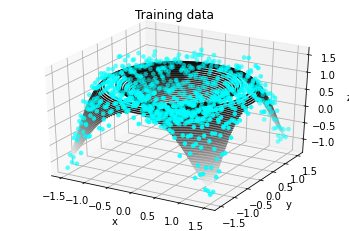

In [92]:
#Plotting the target function and the training data
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)

X, Y = np.meshgrid(x, y)
Z = my_target(X, Y)

ax.contour3D(X, Y, Z, 50, cmap='binary')

X, Y, np.meshgrid(x, y)
Z = np.random.normal(my_target(X, Y), sigma)
ax.scatter(X, Y, Z, color='cyan', linewidth=0.1);

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Training data')

In [86]:
Net = tf.keras.Sequential()
Net.add( Dense( 200, input_shape=(2,), activation="relu") )
Net.add( Dense( 130 , activation="relu" ) )
Net.add( Dense( 50, activation="relu") )
Net.add( Dense( 1, activation="relu") )
    
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

Net.compile( loss='mean_squared_error', optimizer=opt , metrics=['mse'] )

In [87]:
history = Net.fit(x=data_train, y=f_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(data_valid, f_valid))

Epoch 1/30
32/32 [==============================] - 1s 6ms/step - loss: 0.2577 - mse: 0.2577 - val_loss: 0.2174 - val_mse: 0.2174
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 0.1949 - mse: 0.1949 - val_loss: 0.1871 - val_mse: 0.1871
Epoch 3/30
32/32 [==============================] - 0s 4ms/step - loss: 0.1713 - mse: 0.1713 - val_loss: 0.1678 - val_mse: 0.1678
Epoch 4/30
32/32 [==============================] - 0s 4ms/step - loss: 0.1552 - mse: 0.1552 - val_loss: 0.1931 - val_mse: 0.1931
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 0.1493 - mse: 0.1493 - val_loss: 0.1478 - val_mse: 0.1478
Epoch 6/30
32/32 [==============================] - 0s 4ms/step - loss: 0.1276 - mse: 0.1276 - val_loss: 0.1282 - val_mse: 0.1282
Epoch 7/30
32/32 [==============================] - 0s 4ms/step - loss: 0.1083 - mse: 0.1083 - val_loss: 0.1139 - val_mse: 0.1139
Epoch 8/30
32/32 [==============================] - 0s 4ms/step - loss: 0.0937 - mse: 0.09

In [88]:
# evaluate model
score = Net.evaluate(data_valid, f_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.0637 - mse: 0.0637

Test loss: 0.06372693181037903
Test accuracy: 0.06372693181037903


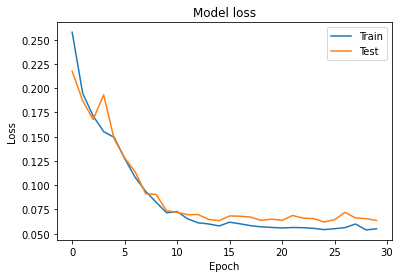

In [89]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

(-0.5, 99.5, -0.5, 99.5)

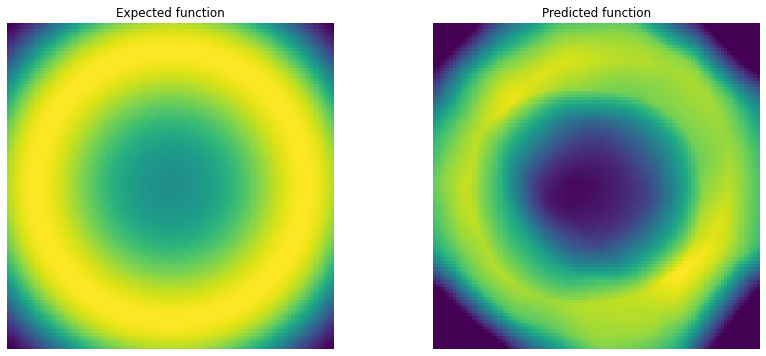

In [90]:
fig , ax = plt.subplots( 1 , 2 , figsize= (14 , 6) )

x = np.linspace(-1.5 , 1.5 , 100)
y = np.linspace(-1.5 , 1.5 , 100)
X,Y = np.meshgrid(x, y) # grid of point
Z = my_target(X, Y) # evaluation of the function on the grid
img = ax[0].imshow( Z , origin="lower")
ax[0].axis('off')
#fig.colorbar(img)
ax[0].set_title("Expected function")


data_in = np.zeros( [100*100,2] )
data_in[:,0]=X.flatten()
data_in[:,1]=Y.flatten()
f_pred = Net.predict(data_in)

ax[1].imshow( f_pred.reshape( (100,100) )  , origin='lower' )
ax[1].set_title("Predicted function")
ax[1].axis('off')

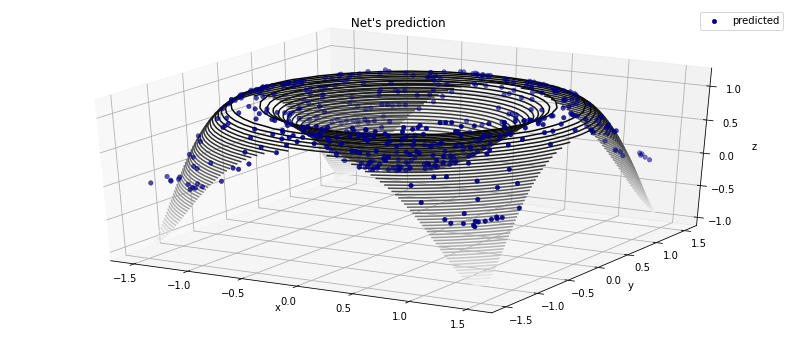

In [94]:
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection='3d')

x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)

X, Y = np.meshgrid(x, y)
Z = my_target(X, Y)
ax.contour3D(X, Y, Z, 50, cmap='binary')

x_predicted = np.random.uniform(-1.5, 1.5, size=(500,2))
y_predicted = Net.predict(x_predicted)

ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, color='navy', linewidth=0.5, label='predicted')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title( " Net's prediction " )
ax.legend()

    Per il fit di una funzione bidimensionale ho usato una rete più profonda, composta da 4 layers con attivazione "relu". L'ottimizzatore usato è Adam, che è risultato essere più effeciente nei precedenti esercizi svolti. Il training della rete ha richiesto più dati che nei casi precedenti, am le previsioni del modello, come si vede dai grafici, sono buone: la loss function finale raggiunge un valore 0.06 e le previsioni rispecchiano la funzione target in modo abbastanza fedele.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [102]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

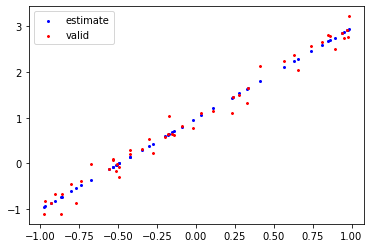

[array([[1.9878788]], dtype=float32), array([0.9867354], dtype=float32)]

In [103]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()